# 희소 표현 vs 밀집 표현
- One-Hot encording: 단어를 벡터로 나타낼 수 있는 방법들 중 가장 기본적인 방식
- One-Hot encording을 통해 나온 feature vector는 표현하고자 하는 단어 인덱스에 해당하는 값만 1이고, 나머지는 전부 0의 값을 가짐.
- 희소 표현(Sparse representation): 벡터 or 행렬의 값이 대부분 0으로 표현되는 것. (ex) Sparse: [0, 0, 1, 0, 0, 0]
- 밀집 표현(Dense representation): 벡터 or 행렬의 대부분 값이 0 이외의 값을 갖고 있는 것. (ex) Dense: [-0.4, 1.2, 0.7, 0.2]

- One-Hot encording 및 TF-IDF 등의 희소 표현
  - 고차원 (일반적으로 20000 ~ 50000차원 정도)
  - One-Hot encording, BoW, TF-IDF: 대부분의 요소값이 0으로 희소 표현이다.
    - 희소 행렬의 문제: 단어-문서 행렬을 사용하여 잠재 의미 공간을 추출하는데, 단어와 문서의 빈도수가 낮아질수록 정보 손실이 발생한다.

# 워드 임베딩
- 밀집 표현이란?
  - 상대적으로 저차원 (일반적으로 50~ 1000 차원)
  - 대부분의 요소값이 0이 아님.

- 밀집 표현의 장점
  - 상대적으로 저차원이기 때문에 머신러닝 특징으로 활용하기에 용이함.
  - 카운트 기반 희소 표현보다 일반화 성능이 좋음.
  - 유의어를 다루는데 있어 더욱 유리함.

- 워드 임베딩(Word embedding)이란?
  - 각 단어를 밀집 표현 형태로 나타내는 단어 표현 방식을 의미함.
  - 단어에 대한 feature vector이다.
  - 각 단어를 워드 임베딩으로 나타내면, 단어 사이의 유사도 계산이 가능하다.
  - 워드 임베딩을 활용하면 벡터 지향적 추론이 가능하다.
    - 즉, 의미와 관련된 추론 작업들을 벡터 연산을 통해 할 수 있다는 것이다.
  - 여러 단어들에 대한 임베딩을 차원 축소한 뒤 2D 또는 3D로 나타냄으로써 단어들 사이의 관계와 군집화 정도를 시각화할 수 있음.
    - 임베딩 학습이 잘 됐는지 정도를 보기 위해 시각화하여 관찰한다.
    - 일반적으로 2D로 차원 축소하여 나타냄.

  - 각 단어에 대해 적절한 밀집 표현을 찾는 것은 규칙 기반으로는 어렵기 때문에 아래 방식들을 통해서 밀집 표현을 얻음.
    - 1. 의미 분석 기반: LSA, LDA
    - 2. 신경망 언어 모델에 기반한 static embedding 방식들: Word2Vec, GloVe, FastText
    - 3. 문맥에 따라 다른 임베딩을 제시하는 contextual embedding 방식들: ELMo, BERT

  - distributional hypothesis by J.R. Firth in 1957
    - 유사한 문맥(context)에서 등장하는 단어는 유사한 뜻을 가지고 있을 것이라는 가설이다.
    - 본 가설 및 NLP 전반에서 문맥이란 특정 단어 주변의 단어 집합을 의미한다.
    - 현재 NLP에서의 다양한 단어/문장에 대한 표현 학습의 근간이 되는 가설

- Word Embedding의 기본 개념
  - 1. Word Embedding에서 "Embedding"이 무엇인가?
    - "Embedding": 기하학적 맥락에서 어떤 고차원적인 객체를 저차원 공간에 매핑하는 과정을 나타낸다.
  - 2. "Embedding"의 의미란?
    - 고차원 공간에 있는 데이터를 저차원 공간에 매핑하여 의미를 유지하는 변환을 의미함.
    - 원래 데이터의 특징을 보존하면서 저차원 표현으로 바꾸는 작업임.
    - "Embedding"의 목표: 정보 손실을 최소화하고 데이터 간의 관계를 유지하는데 목표를 둔다.
  - 3. "Word Embedding"이란?
    - 단어를 연속된 실수 벡터로 표현하는 방법
    - 단어의 의미를 저차원 벡터에 내포
    - 단어 간의 의미적 유사성 반영
  - 4. "Word Embedding"의 장점
    - 의미적 유사성 반영: 벡터 공간에서 의미적으로 유사한 단어들이 서로 가까운 벡터로 표현되므로, 단어 간의 유사성 및 관계를 쉽게 계산할 수 있다.
    - 저차원 표현 가능: 원-핫 인코디에 비해 차원이 낮아 메모리와 계산 효율성이 높다.
    - 다양한 NLP 작업에 활용 가능: 문서 분류, 감정 분석, 기계 번역, 정보 검색 등 다양한 NLP 응용 분야에서 활용될 수 있음.

# Word2Vec
- 비지도 학습으로 분류됨.
- 자동으로 label 생성
- 단어를 벡터로 변환해주는 알고리즘의 일종
  - 1. CBOW: 주변 단어들로부터 중심 단어 예측하기
  - 2. skip-gram: 중심 단어가 주어지면, 주변 문맥(단어, 토큰)을 예측하기

- 분포 가설에 기반한 학습 방식을 갖고 있다.

# Word2Vec - CBOW
- Continunous Bag of Words: 단어의 의미적 관계를 벡터 공간에 표현하기 위해 신경망을 사용하여 단어 벡터를 학습하는 방식
- 주변 단어들을 통해 중심 단어를 예측하도록 하는 임베딩 학습 방식
- window: 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정해야 하는 범위
  -  ex) The fat cat sat on the mat
    - if window 크기 = 2이고 중심 단어 = sat이면, 중심 단어 기준으로 앞의 두 단어인 fat, cat과 뒤의 on, the를 입력으로 사용함.
  - window 크기 = n이라면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수 = 2*n이다.

- 임베딩을 학습하는 과정
  - 1. Input Layer
    - 입력으로 주변 단어들을 사용한다.
    - 주변 단어: 원-핫 벡터로 표현되는데, 윈도위 크기만큼 1의 값을 갖는다.
    - 중심 단어: 고차원 벡터의 한 위치에서만 1의 값을 갖고 나머지 값은 0으로 채워진 벡터이다.
  - 2. Hidden Layer(Projection Layer)
    - 은닉층은 입력 벡터를 저차원의 밀집 벡터로 변환함.
    - 이 과정에서 각 입력 벡터를 가중치 행렬과 곱하여 임베딩 벡터를 학습하게 된다.
    - 이 층은 M개의 뉴런을 가지는데 원하는 개수로 M을 조절한다.
    - M: 뉴런 개수
    - V: 총 단어 수
    - Input에서 projection으로 가는 가중치(W): [V, M]의 shape를 가진다.
    - Projection에서 Output으로 가는 가중치(W'): [M, V]의 shape을 가짐.
    - 모든 입력 단어의 임베딩 벡터를 평균화하여 하나의 벡터로 만든다.
    - 은닉층의 출력: 모든 입력 단어의 임베딩 벡터의 평균 벡터
  - 3. Output Layer
    - 은닉층의 출력 벡터를 사용하여 중심 단어를 예측한다. 출력층은 Softmax 함수를 사용하여 중심 단어의 확률 분포를 계산함.
    - 중심 단어의 확률 분포는 중심 단어가 될 가능성이 높은 단어를 나타낸다.
  - 4. Loss function
    - CBOW 모델은 손실 함수로 Cross-Entropy를 사용하여, 실제 중심 단어와 예측된 중심 단어 간의 차이를 최소화하도록 학습함.
    - 손실 함수는 확률 분포와 실제 중심 단어의 원-핫 인코딩 벡터 간의 차이를 계산하여 신경망의 가중치를 업데이트 함.

- CBOW에서의 가중치
  - 특정 단어의 feature vector를 반환해주는 것과 같다.
  - lookup table이라고 함.
  - lookup table
    - 단어의 임베딩 벡터를 효율적으로 가져오는데 사용되는 데이터 구조임.
    - 학습 과정에서 단어 임베딩을 저장하고, 입력으로 주어진 단어의 벡터 표현을 반환하는 역할을 함.
    - 단어 임베딩 행렬의 역할: lookup table은 각 단어에 대해 고유한 임베딩 벡터를 저장하는 행렬을 말합니다. 이 행렬을 "임베딩 행렬"이라고도 하며, 크기는 [총 단어 수, 임베딩 벡터의 차원]

- CBOW에서의 학습 상세 과정
  - 1. (Input: [1, V]) 중심 단어에 대한 One-Hot Vector 입력
  - 2. (Weight: W = [V, M]) 입력 벡터와 lookup table과 곱: [1,V] * [V, M] = [1, M]
    - 예시
      - x_fat * W_V*M = V_fat
      - x_cat * W_V*M = V_cat
      - x_on * W_V*M = V_on
      - x_the * W_V*M = V_the
  - 3. (Projection: W' = [M, V]) 각 단어의 원-핫 벡터와 가중치 값을 곱한 결과는 평균 방식으로 취합되어 projection layer의 값을 이루게 됨.
    - 이렇게 값을 취합하는 과정에서 별도의 activation function은 적용되지 않음에 유의
      - Linear activation이라고 볼 수 있음.
      - v = (V_fat + V_cat + V_on + V_the) / (2 * window size)
      - v_1*M * W'_M*V = v_1*V
    - Projection layer에서 취합된 값에 다시 한 번 가중치와의 곱을 수행하고, 이렇게 구해진 크기 V의 벡터에 softmax를 적용하여 목표하는 One-Hot Vector와의 손실값을 계산함.
     - One-Hot vector 및 softmax가 적용된 벡터 사이의 손실값으로는 CE loss가 널리 활용된다.
    - Projection layer에서 Output layer로 가는 과정과 학습 과정은 소프트 맥스 회귀와 매우 유사하다.

- CBOW 학습 과정 요약
  - 1. window를 이용해서 중심 단어와 문맥을 구분
  - 2. 문맥의 단어들에 대해서 One-Hot encoding으로 표현된 벡터와 가중치 W의 곱을 구한 후 평균해서 Projection layer의 값을 계산
  - 3. Projection layer의 값과 W'의 곱을 구한 후 softmax를 적용하여 예측값 도출
  - 4. 중심 단어의 One-Hot vector와 예측값 사이의 손실값 계산 후 W 및 W'를 경사하강법으로 학습
  - 5. 1~4과정까지가 1iteration이며, 해당 과정을 모델(W, W')수렴시까지 반복한다.
  - 6. 학습이 완료된 CBOW 모델은 W, W' 값들을 남기는데, 기본적으로는 lookup table이라고 불리는 W의 각 row를 해당 index에 해당하는 단어의 최종 워드 임베딩으로 활용한다.
    - W'의 경우도 각 column이 M의 크기를 갖기 때문에, 임베딩으로 활용 여지가 있으며, W와 W'의 정보를 평균하여 임베딩으로 활용할 수도 있다.


# Word2Vec - Skip-gram

- Skip-gram이란?
  - Skip-gram의 경우, CBOW와 반대로 중심 단어로부터 나머지 문맥의 단어들을 예측할 수 있도록 학습을 진행함.
    - 학습 원리는 CBOW와 유사함.

  - Projection layer에서 출력층을 계산하는 가중치는 [M(뉴런 개수), V(총 단어 수)]의 shape을 가지며 그 결과로 나온 V 차원의 벡터에 대해서 softmax를 적용한 후, 문맥 상의 각 단어에 대한 One-Hot Vector와 비교한 손실 함수 값을 계산하고 취합하여 학습에 이용함.
  
  - CBOW vs Skip-gram
    - CBOW < Skip-gram
    - 보통 CBOW와 Skip-gram의 성능 비교 결과 Skip-gram 방식이 보편적으로 성능이 더 잘 나오는 편이지만, Corpus와 원하는 task에 따라 성능 우열이 달라질 수 있다.

- Word2Vec 성능 개선 방안
  - Mikolov를 비롯한 Word2Vec 연구진에서는 후속 논문들을 통해 Word2Vec의 성능을 개선하기 위한 방안들을 제시하였고, 대표적인 방안들이 나왔다.
    - 1. 자주 나오는 구(phrase) 활용
      - 기본적인 Word2Vec은 n-gram을 활용하지 않으며, n-gram을 활용할 경우, 다양한 구에 대한 임베딩을 학습할 수 있지만, 의미 없는 n-gram을 토큰으로 관리할 수 있다.
      - 의미 없는 n-gram을 토큰으로 관리하는 불상사를 막기 위해 phrase score를 도입하여, 두 단어가 연이어 등장할 확률이 높은 경우 하나의 phrase 토큰으로 관리하도록 함.
      - score(w_i,w_i+1) = (count(w_i,w_i+1)−δ) / (count(w_i) * count(w_i+1))
        - count(w_i,w_i+1): 단어 w_i와 w_i+1이 함께 연이어 등장한 빈도
        - count(w_i): 단어 w_i의 개별 등장 빈도
        - count(w_i+1): 단어 w_i+1의 개별 등장 빈도
        - δ: 스무딩을 위한 상수, 드문 단어 조합에 대한 과도한 스코어 상승을 방지하기 위해 사용된다.

    - 2. 빈도 높은 토큰의 subsampling
      - a, the 같이 빈도가 높으나 큰 의미를 갖지 않는 단어들은 너무 자주 샘플링 되면 분포 가설에 기반한 임베딩 학습에 방해가 됨.
        - the라는 단어로 주변 단어를 예측하는 것은 불가능함.
      
      - 불용어 제거를 할 수도 있으나, 불용어 제거를 했더라도 빈도가 높아 학습에 방해가 되는 토큰들이 남아있을 수 있음.

      - P(W_i) = 1 - root(t / f(W_i))
        - P(W_i) = 단어 W_i가 subsampling될 확률
        - f(W_i) = 단어 W_i의 상대적 빈도(전체 Corpus에서의 등장 확률)
        - t = 사전에 정의된 threshold
      
      - 이에 t를 충분히 작게 설정한 후 subsampling 확률을 조절하여, t보다 등장 확률이 높은 토큰은 P 값에 해당하는 확률로 윈도우 내에 있더라도 제거되도록 함.

    - 3. Negative sampling
      - 기본적인 Word2Vec의 학습 방식은 Corpus가 방대한 경우, 많은 수의 가중치 업데이트를 요구함.
        - 작은 윈도우 내에서의 의미 유추 작업만 수행하므로 업데이트 속도가 느림.
      
      - 학습할 때, 비슷한 거끼리만 학습시키는 것이 아니라 다른 문맥에 있는 것까지 같이 학습시킴.
      
      - 서로 윈도우 내에 있는 Positive 샘플들 뿐 아니라, 서로 윈도우에 있지 않은 Negative 샘플에 대한 학습까지 동시에 진행하여 매 iteration당 학습 효율을 개선함.

      - (문제 발생) 전체 어휘의 모든 단어에 대해 확률을 계산하는 것은 매우 비용이 많이 드는 문제가 발생

      - (해결책) Negative Sampling
        - 1. 긍정 예제(Positive Example)
          - 주어진 중심 단어 W와 실제 주변 단어 C를 긍정 예제로 사용한다. 이 쌍은 모델이 긍정적으로 학습해야 하는 목표 관계이다.
        - 2. 부정 예제(Negative Example)
          - 주변 단어가 아닌 중심 단어와 무작위로 선택된 단어를 부정 예제로 사용한다. 이 단어들은 중심 단어와 관계가 없다고 가정하고 학습한다. 부정 예제의 수는 하이퍼 파라미터로 설정할 수 있으며, 일반적으로 5 ~ 20개 사이의 부정 예제를 사용한다.

- Word2Vec - skip-gram with Negative Sampling(SGNS)
  - "The cat sits on the mat"

  - 1. 학습 설정
    - window size = 2
    - Negative example k = 2
    - 임베딩 벡터의 차원 = 3
  
  - 2. 학습 과정
    - 1. 중심 단어와 주변 단어 선택
    - 2. 긍정 예제 생성
      - "cat" - "The"
      - "cat" - "sits"
    - 3. 부정 예제 샘플링
      - 어휘 사전에 있는 다른 단어 중에서 무작위로 2개의 부정 예제를 샘플링함.
      - ex) "dog"와 "run"이 부정 예제로 선택되었다고 가정함.
    - 4. 목적함수 계산
      - log(sigmoid(v_The * v_cat)) + log(sigmoid(v_sits * v_cat)) + log(sigmoid(-v_dog * v_cat)) + log(sigmoid(v_run * v_cat))
        - 여기서 v는 각각의 단어에 대한 임베딩 벡터이다.
    - 5. 오차 역전파와 가중치 업데이트
      - 목적 함수의 기울기를 계산하여 중심 단어와 주변단어, 부정예제 단어들의 임베딩 벡터를 업데이트한다.
      - 긍정 예제는 중심 단어 "cat"과의 관계를 강화하는 방향으로 업데이트하고, 부정 예제는 중심 단어와의 관계를 약화하는 방향으로 업데이트함.

- skip-gram with Negative Sampling(SGNS) 모델에서는 기존의 Word2Vec 모델과는 다르게 두 토큰을 입력받아서 해당 토큰들이 같은 문맥에 존재하는지(윈도우 내에 같이 존재), 아닌지를 판별하는 분류기를 만드는 것을 목표로 한다.

- 토큰 W, C가 입력되었을 때, 같은 문맥(positive sample)일 확률은 P(+ | W, C)이다.

- 다른 문맥에 존재하는 두 토큰(Negative sample)일 확률은 P(- | W, C) = 1 - P(+ | W, C)

- 기존의 skip-gram 모델이 문맥 단어들에 대한 확률 분포를 예측하는 모델이었다면, SGNS는 구조는 유사하지만, 두 토큰이 같은 문맥이냐 아니냐를 구분하는 이진 분류기 모델이라고 할 수 있음.

- 두 토큰이 같은 문맥에 존재한다면, 유사도가 높을 것이라고 가정하고 있으며, 유사도의 척도로는 임베딩 값 내적을 활용한다.
  - Similarity(W, C) =~ C*W
  - 그러나 내적값 자체는 분포가 정규화되어 있지 않고, 확률값으로 사용이 어려우므로 이에 대해 sigmoid 함수를 적용하여 확률값으로 사용한다.
    - P(+ | W, C) = sigmoid(C * W) = 1 / (1 + exp^(-C * W))
    - P(- | W, C) = 1 - P(+ | W, C) = sigmoid(-C * W) = 1 / (1 + exp^(C * W))

- 하나의 중심 단어에 대해 여러 개의 positive 샘플이 발생하게 되는데, 이를 모두 고려한 확률은 문맥 내 각 단어들의 확률이 모두 독립적이라고 가정하여 각 확률을 곱한 형태로 도출됨.

- Negative 샘플은 positive 샘플 하나당 k개씩 추출함.

- SGNS에서는 중심 단어의 임베딩(W) 및 문맥과 노이즈 단어의 임베딩(C)를 가중치로 사용함.
  - W: 중심 단어 임베딩 행렬로, 중심 단어에 대한 벡터 표현을 포함한다. 각 단어는 W 행렬의 한 행으로 표현되며, 단어의 의미를 학습한다.
  - C: 문맥 단어 임베딩 행렬로, 문맥 단어와 부정 예제 단어의 벡터 표현을 포함한다. 각 단어는 C 행렬의 한 행으로 표현된다.
  - 이 두 가지 행렬은 모두 학습 중에 업데이트되며, 각 단어에 대해 두 가지 다른 임베딩 벡터가 학습된다. W는 중심 단어로 사용될 때의 임베딩 벡터이고, C는 문맥 단어나 노이즈 단어로 사용될 때의 임베딩 벡터입니다.

- 학습이 끝나면, 가중치 W, C를 얻을 수 있으며, 일반적으로는 두 가중치에서 얻는 각 단어의 임베딩을 더해서 최종 워드 임베딩으로 활용함.
  - W_i + C_i

- SGNS가 여러 번 개선 작업을 거친 Word2Vec의 최종 형태이며, 그 이후에도 보다 발전된 형태의 static embedding들이 제안되어 왔다.
  - 그러나 다양한 상황에서의 성능은 텍스트 전처리, 하이퍼 파라미터 설정 등에 따라 달라지므로 static embedding 중에서 여전히 활용도가 높은 기술이라고 볼 수 있다.





In [23]:
# Word2Vec-SGNS 구현
# TF Keras API를 활용한 Word2Vec SGNS 구현

# 20뉴스그룹 데이터 로드
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수:', len(documents))

총 샘플 수: 11314


In [24]:
# 데이터 전처리
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ", regex=True)
# 길이가 3이하인 단어 제거(길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())
# NaN 및 empty string 제거
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print('전처리 후 샘플 수:',len(news_df))

전처리 후 샘플 수: 10995


In [25]:
# 불용어 제거 및 데이터 생성 불가한 문서 제거(토큰 1개인 경우 학습용 샘플 생성이 안됨.)
# 불용어 제거
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(np.array(tokenized_doc, dtype=object), drop_train, axis=0)
print('총 샘플 수:', len(tokenized_doc))

총 샘플 수: 10940


In [28]:
# 토큰화 진행
# 토큰화 이후 각 토큰들은 토큰 인덱스로 표현됨을 알 수 있음.
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [29]:
# 단어 집합 크기 확인 및 skip-gram 학습 데이터 생성
# keras 내부에 skip-gram의 positive
vocab_size = len(word2idx) + 1
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 64277


In [30]:
from tensorflow.keras.preprocessing.sequence import skipgrams

# Negative Sampling
skip_grams = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in encoded]

In [31]:
# 생성된 skip-gram positive, negative 데이터 확인

# 첫번째 샘플 skip_grams[0] 내 skipgrams로 형성된 데이터 셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
  print("{:s} ({:d}), {:s} ({:d}) -> {:d}".format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]))

report (581), shame (4988) -> 1
israeli (442), dobyns (37116) -> 0
shame (4988), vonda (31404) -> 0
seem (207), squirt (50509) -> 0
commited (7837), isophotal (47813) -> 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 100)         │      6,427,700 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 100)         │      6,427,700 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 1, 1)           │              0 │ embedding_1[0][0],     │
│                           │                        │                │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1)              │              0 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 1)              │              0 │ reshape[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,855,400 (49.04 MB)

 Trainable params: 12,855,400 (49.04 MB)

 Non-trainable params: 0 (0.00 B)

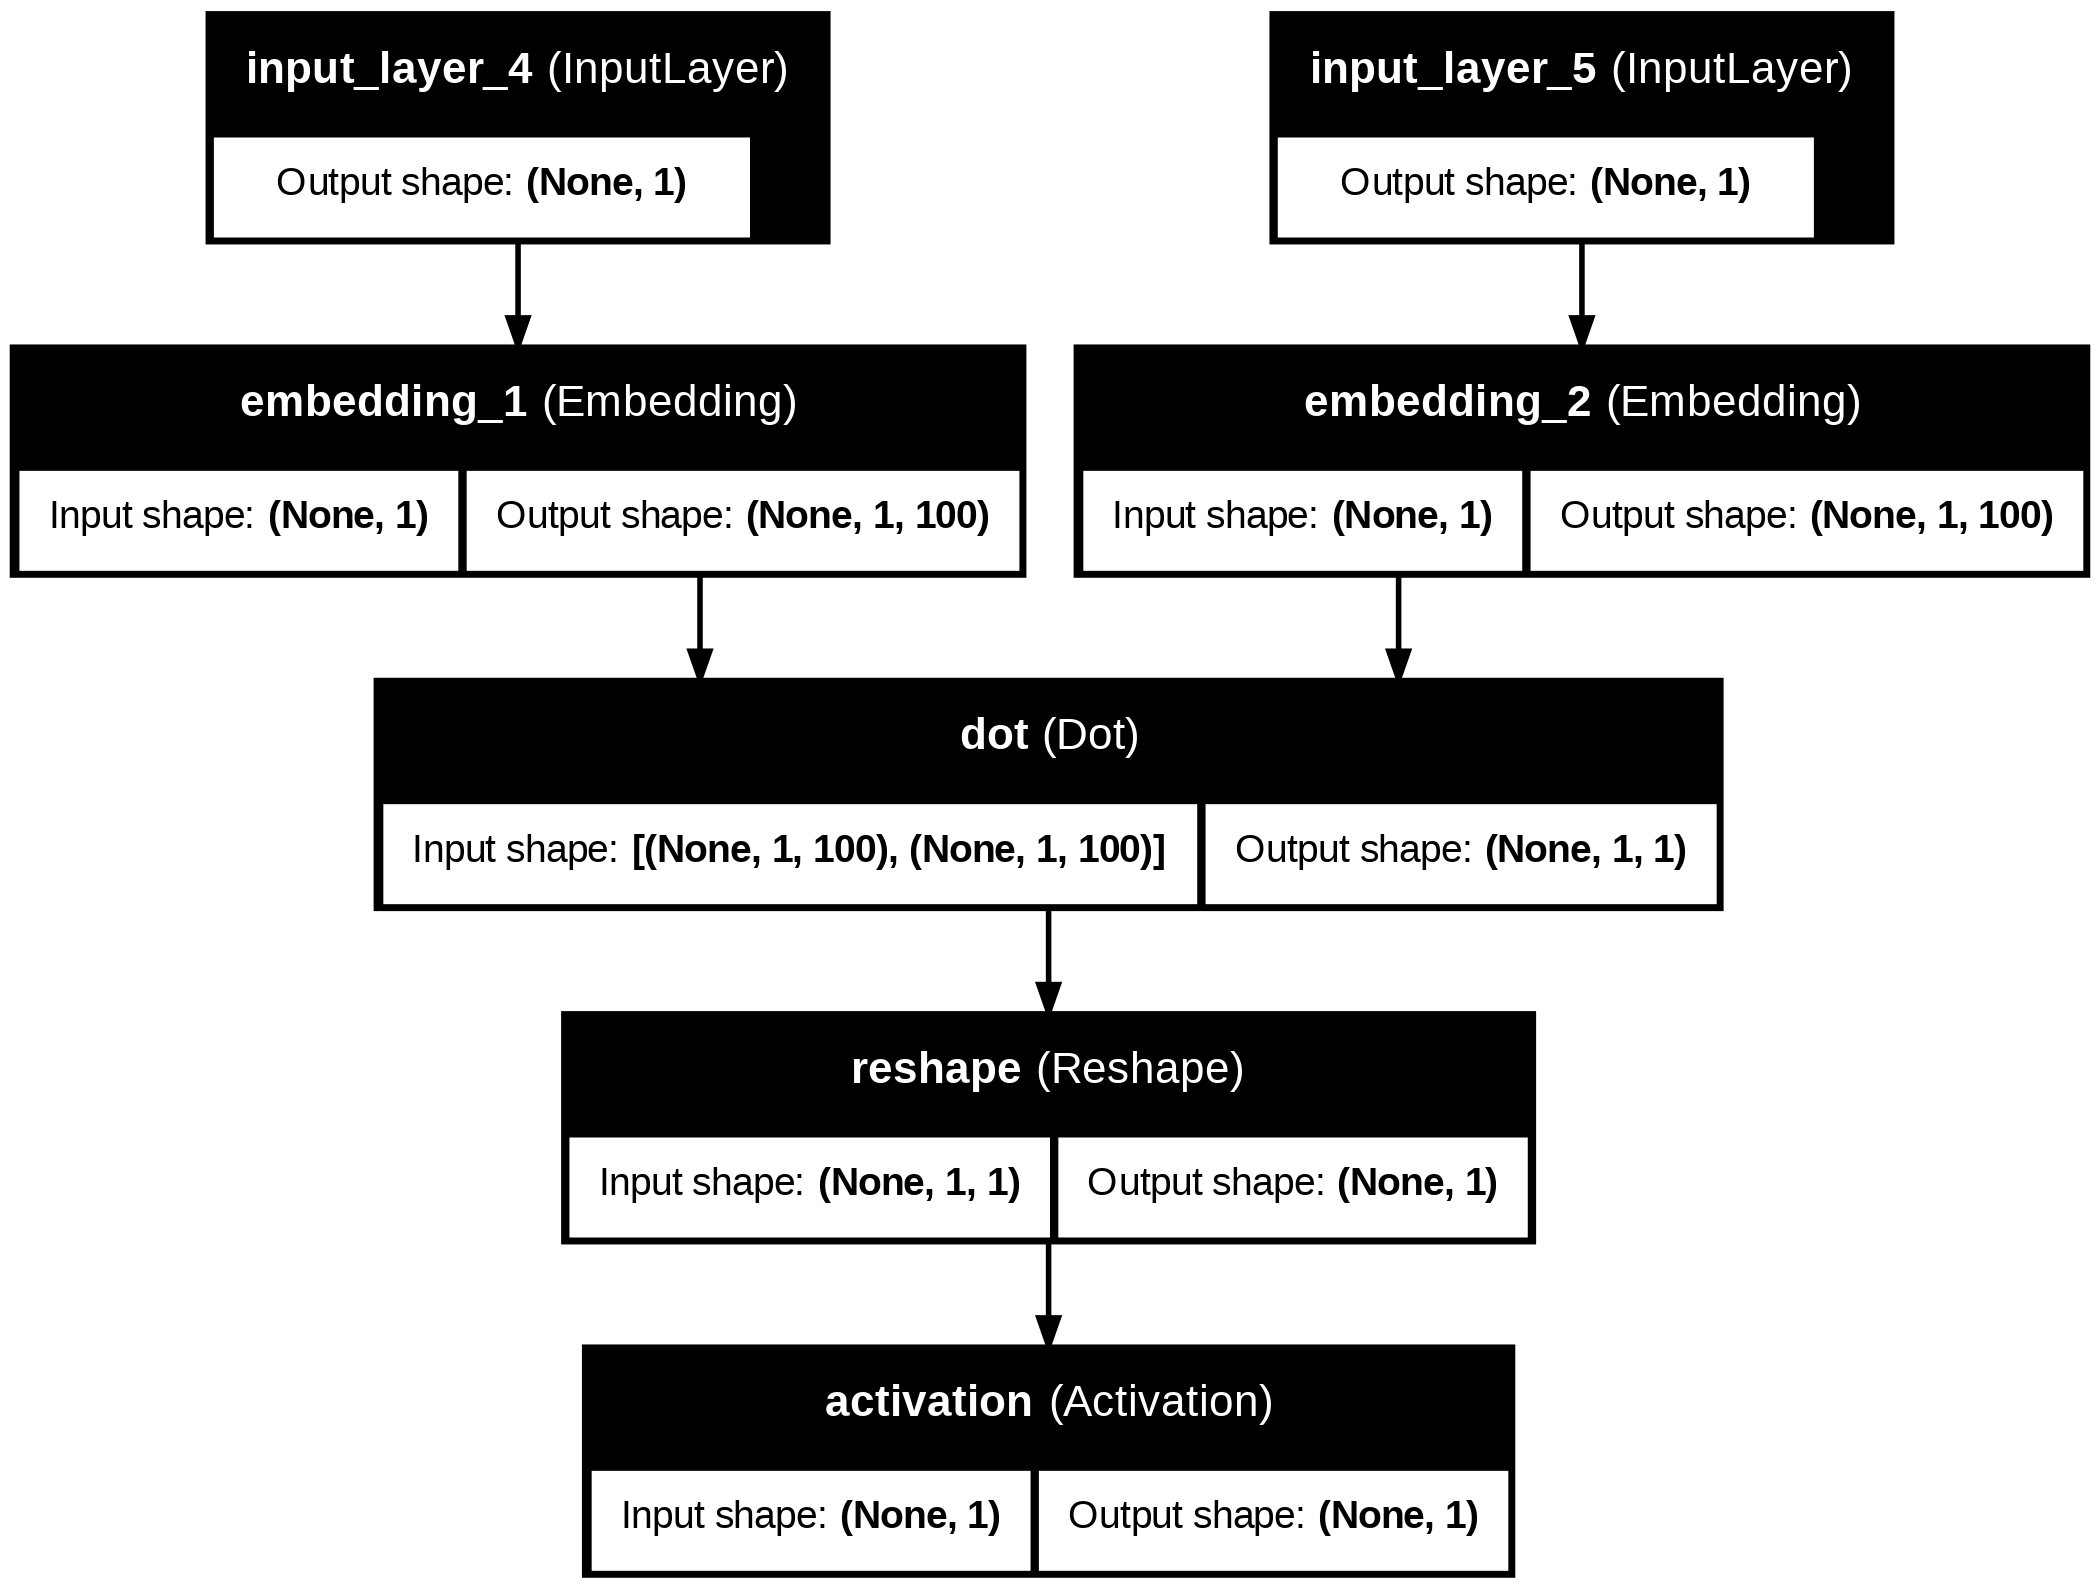

In [34]:
# 모델 구성 및 시각화
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model

embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')